# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [143]:
import pandas as pd
import seaborn as sns

In [154]:
temps = pd.read_csv('data/temps.csv')
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [142]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


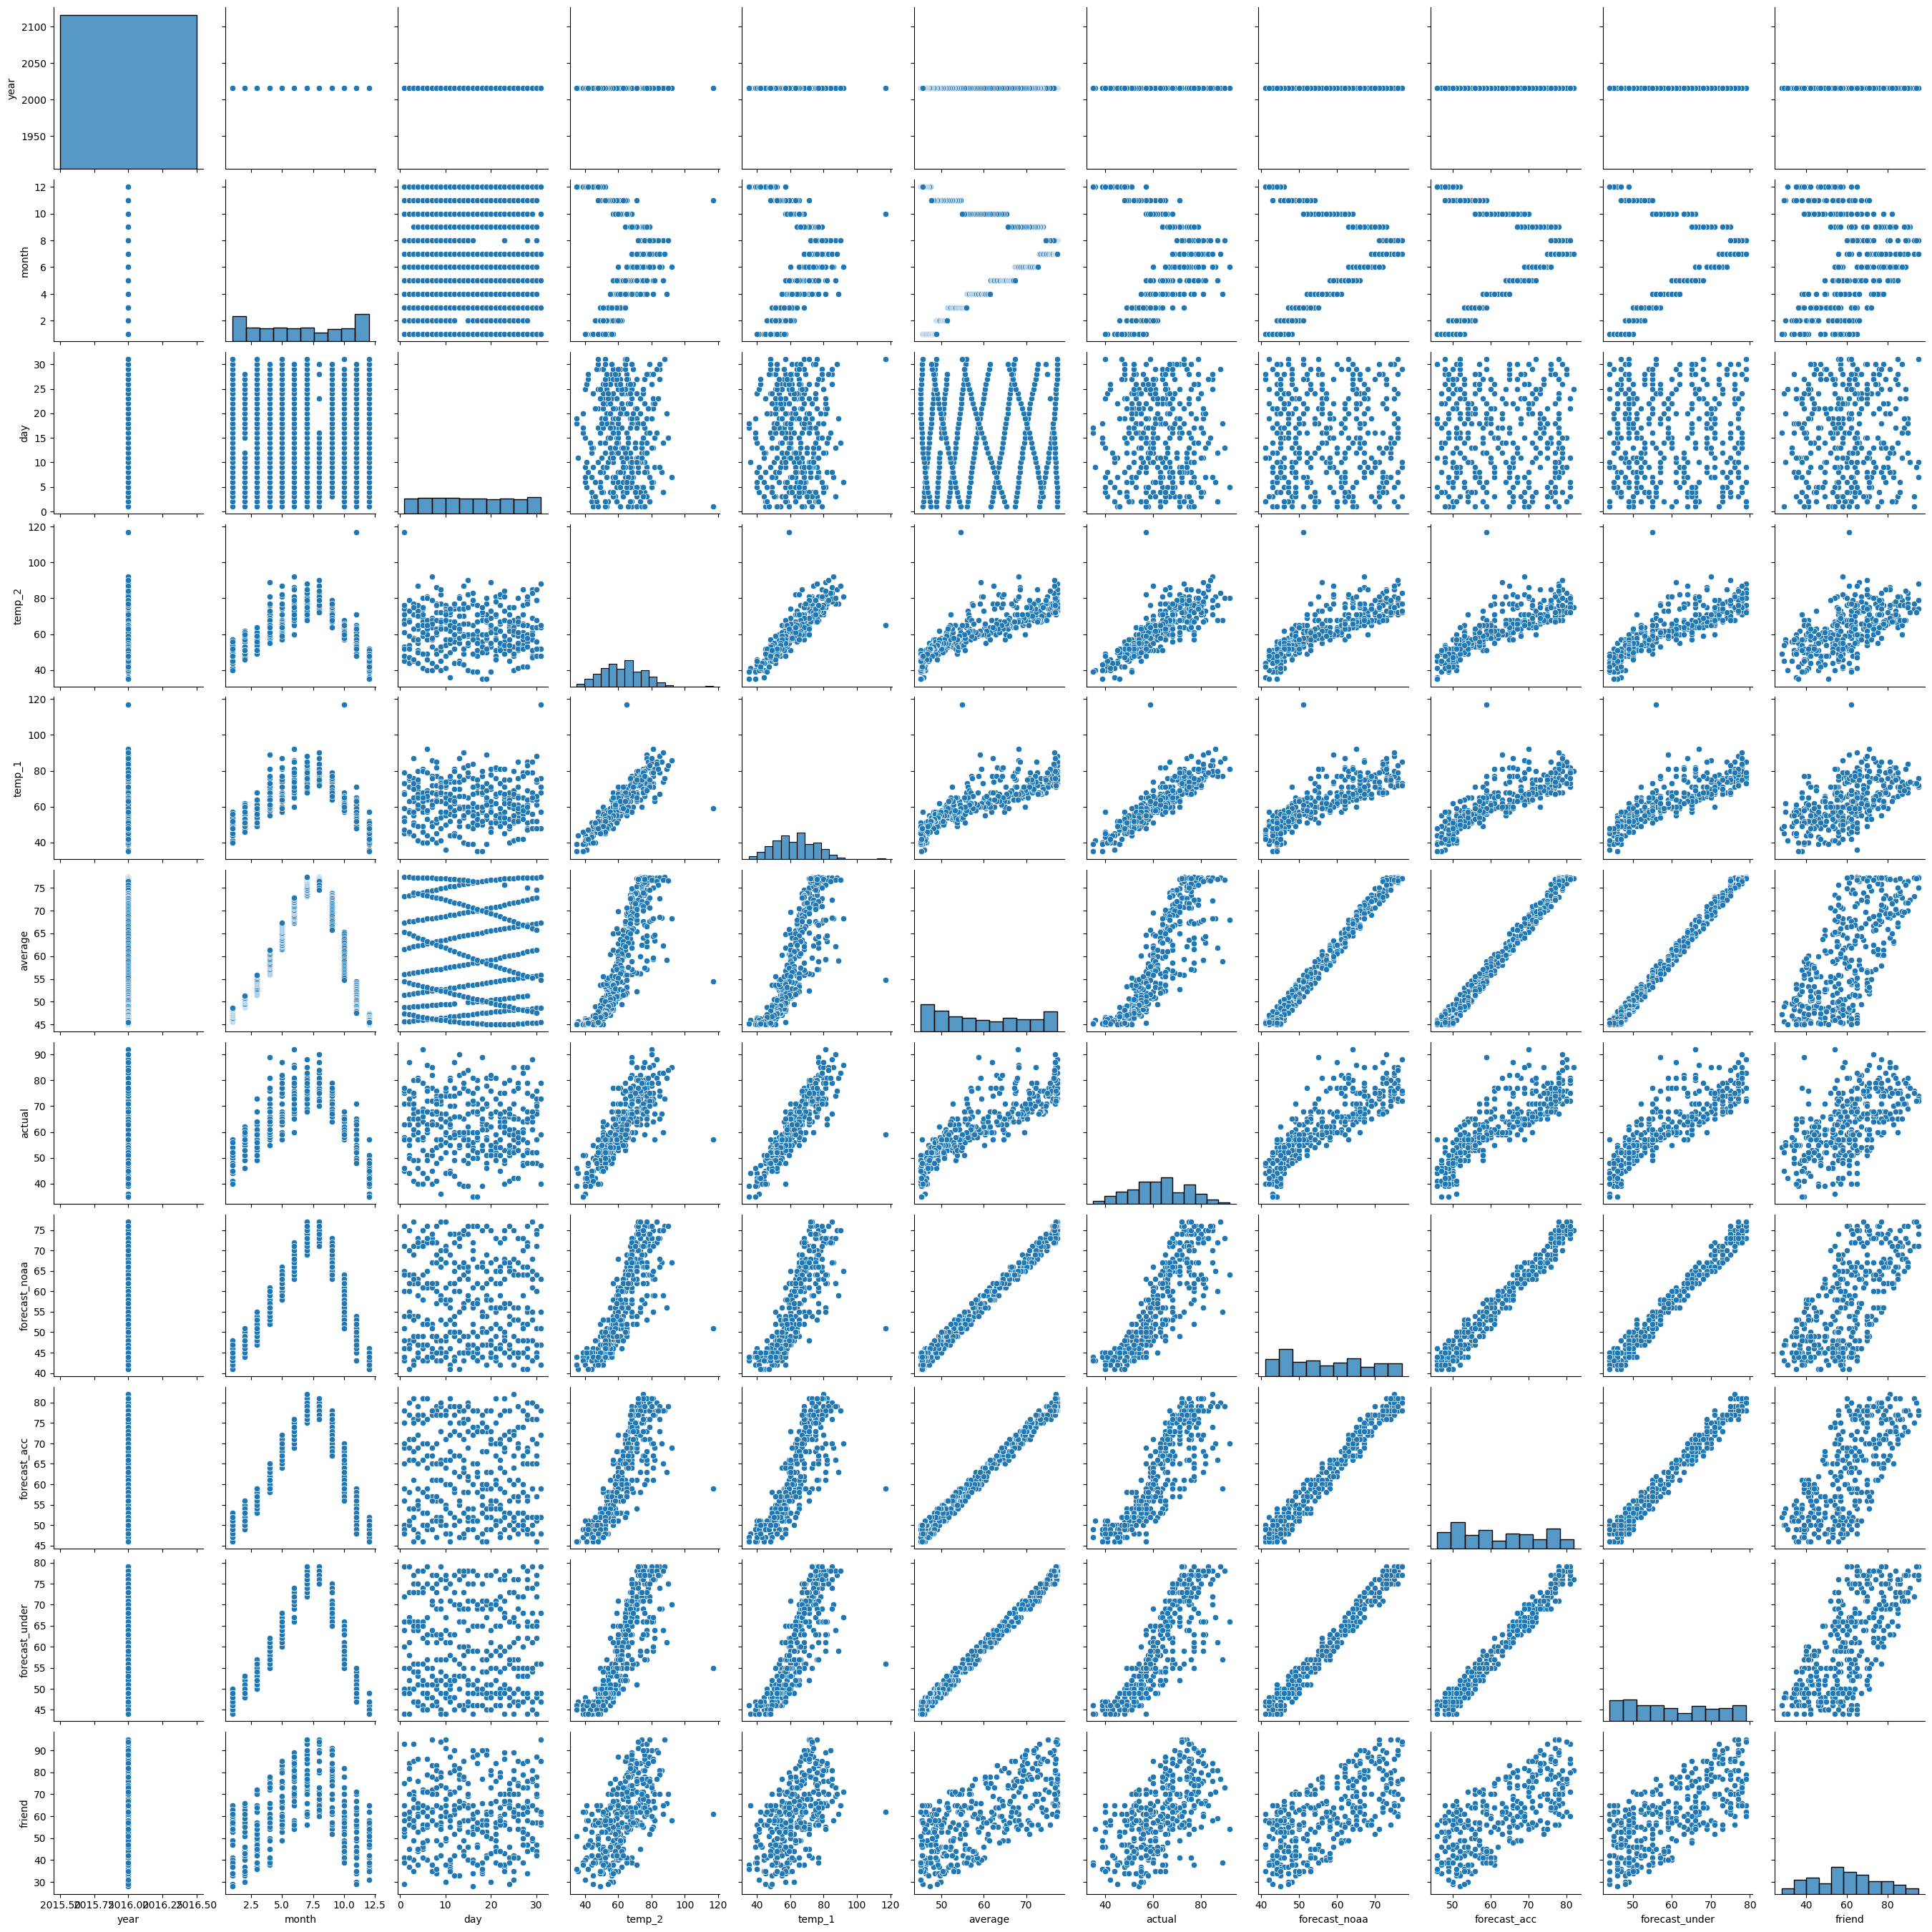

In [144]:
sns.pairplot(temps)

C:\Users\misla\AppData\Local\Temp\ipykernel_13068\3575039129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temps.corr(), annot= True);


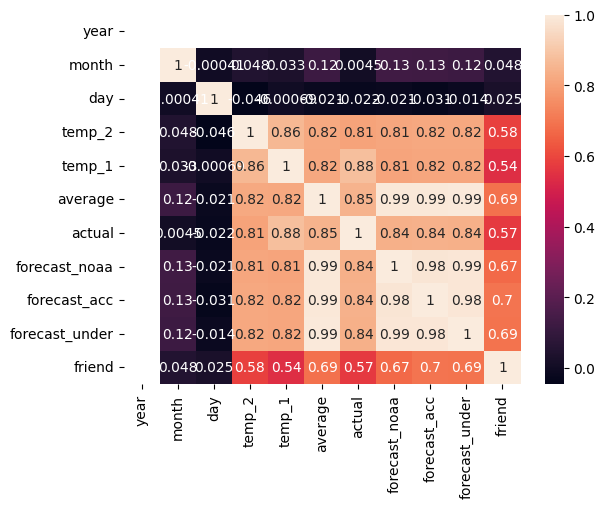

In [146]:
sns.heatmap(temps.corr(), annot= True);

In [151]:
week_map = {'Mon': 0, 'Tues': 1, 'Wed': 2, 'Thurs': 3, 'Fri': 4, 'Sat': 5,'Sun': 6}

In [155]:
temps['week_num'] = temps['week'].map(week_map)

In [156]:
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_num
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,5
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,6
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,1
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,2
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,3
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,4


C:\Users\misla\AppData\Local\Temp\ipykernel_13068\3575039129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temps.corr(), annot= True);


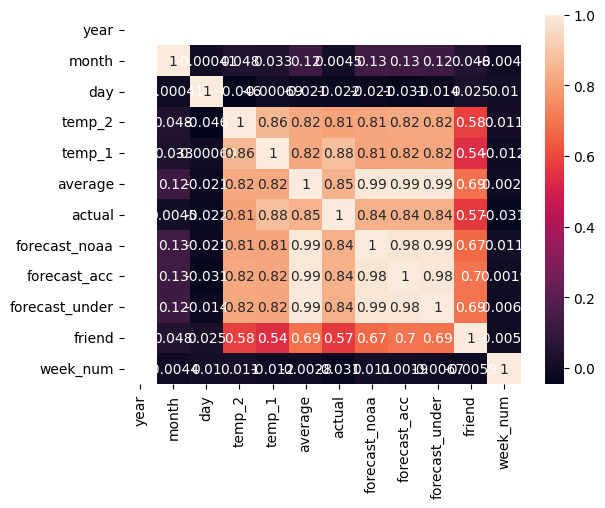

In [157]:
sns.heatmap(temps.corr(), annot= True);

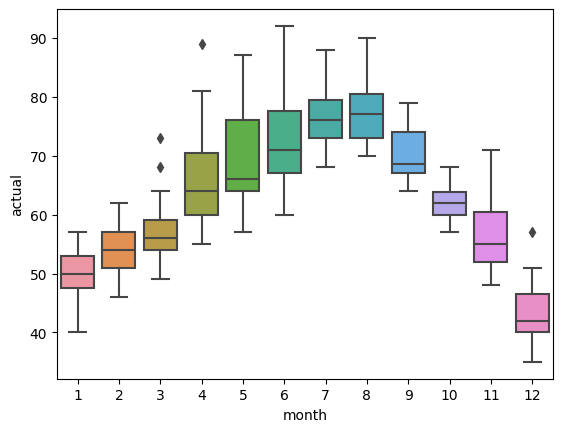

In [159]:
sns.boxplot(data= temps, x = 'month', y= 'actual');

In [163]:
bin_month = {12: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 11: 1, 10: 1, 9: 2, 6: 3, 7: 3, 8: 3}

In [164]:
temps['month_num'] = temps['month'].map(bin_month)


In [165]:
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_num,month_num
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,5,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,6,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,1,0
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,2,0
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,3,0
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,4,0


C:\Users\misla\AppData\Local\Temp\ipykernel_13068\679177302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temps.corr(), annot= True)


<Axes: >

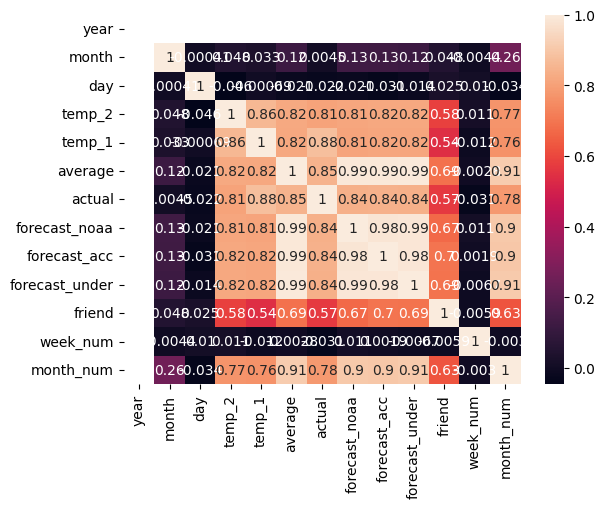

In [166]:
sns.heatmap(temps.corr(), annot= True)

### 2. Trabaja las variables categóricas del dataset

In [168]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
 12  week_num        348 non-null    int64  
 13  month_num       348 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 38.2+ KB


In [169]:
X = temps[['temp_2', 'average', 'forecast_noaa', 'month_num']]
Y = temps['actual']

### 3. Divide en train y test

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

In [172]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (278, 4)
X_test shape:  (70, 4)
Y_train shape:  (278,)
Y_test shape:  (70,)


### 4. Entrena el modelo


In [178]:
from sklearn.tree import  DecisionTreeRegressor

In [179]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [181]:
print('Train: ')
print('-' * 30)
print('MAE: ', mean_absolute_error(Y_train, dtr.predict(X_train)))
print('MAPE: ', mean_absolute_percentage_error(Y_train, dtr.predict(X_train)))
print('MSE: ', mean_squared_error(Y_train, dtr.predict(X_train)))
print('RMSE: ', mean_squared_error(Y_train, dtr.predict(X_train), squared= False))

Train: 
------------------------------
MAE:  0.014388489208633094
MAPE:  0.0002825617826878274
MSE:  0.02877697841726619
RMSE:  0.16963778593599418


In [183]:
print('Test: ')
print('-' * 30)
print('MAE: ', mean_absolute_error(Y_test, dtr.predict(X_test)))
print('MAPE: ', mean_absolute_percentage_error(Y_test, dtr.predict(X_test)))
print('MSE: ', mean_squared_error(Y_test, dtr.predict(X_test)))
print('RMSE: ', mean_squared_error(Y_test, dtr.predict(X_test), squared= False))

Test: 
------------------------------
MAE:  6.8
MAPE:  0.10465386864233953
MSE:  86.51428571428572
RMSE:  9.301305591920185


### 6. Representa el árbol de decision

In [187]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

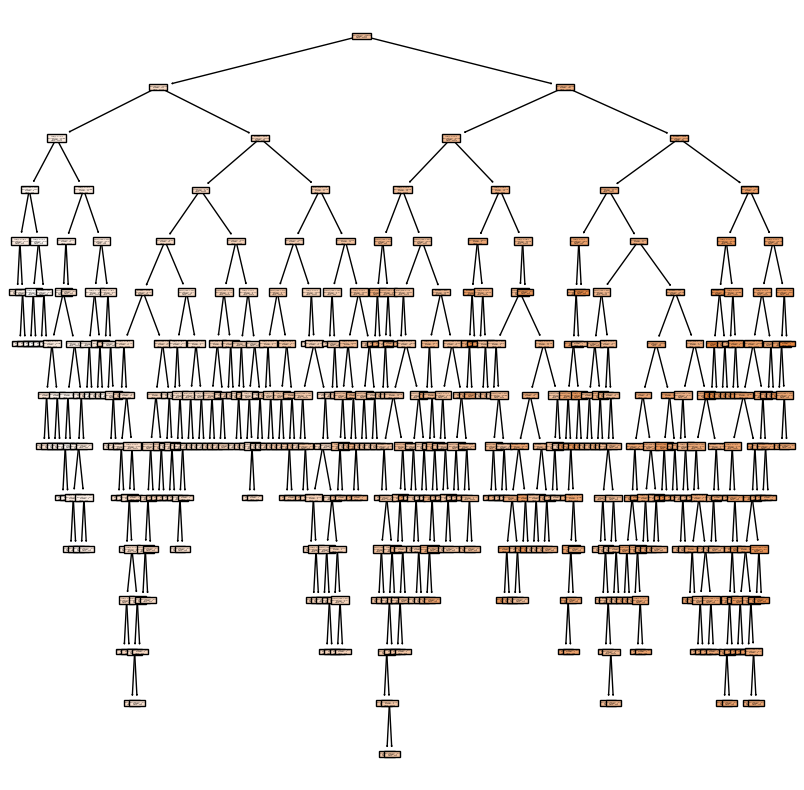

In [188]:
plt.figure(figsize=(10,10))
plot_tree(dtr,
               feature_names=X_train.columns,
               filled = True);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [189]:
dtr_depth3 = DecisionTreeRegressor(max_depth=3)
dtr_depth3.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [190]:
print('Train: ')
print('-' * 30)
print('MAE: ', mean_absolute_error(Y_train, dtr_depth3.predict(X_train)))
print('MAPE: ', mean_absolute_percentage_error(Y_train, dtr_depth3.predict(X_train)))
print('MSE: ', mean_squared_error(Y_train, dtr_depth3.predict(X_train)))
print('RMSE: ', mean_squared_error(Y_train, dtr_depth3.predict(X_train), squared= False))

Train: 
------------------------------
MAE:  4.022953741051053
MAPE:  0.06415148586146732
MSE:  26.59536998345702
RMSE:  5.157069902905818


In [191]:
print('Test: ')
print('-' * 30)
print('MAE: ', mean_absolute_error(Y_test, dtr_depth3.predict(X_test)))
print('MAPE: ', mean_absolute_percentage_error(Y_test, dtr_depth3.predict(X_test)))
print('MSE: ', mean_squared_error(Y_test, dtr_depth3.predict(X_test)))
print('RMSE: ', mean_squared_error(Y_test, dtr_depth3.predict(X_test), squared= False))

Test: 
------------------------------
MAE:  4.454327876364934
MAPE:  0.069734196107014
MSE:  35.184422394732124
RMSE:  5.93164584198451


### 8. Vuelve a evaluar tu modelo

In [192]:
print('Test: ')
print('-' * 30)
print('MAE: ', mean_absolute_error(Y_test, dtr_depth3.predict(X_test)))
print('MAPE: ', mean_absolute_percentage_error(Y_test, dtr_depth3.predict(X_test)))
print('MSE: ', mean_squared_error(Y_test, dtr_depth3.predict(X_test)))
print('RMSE: ', mean_squared_error(Y_test, dtr_depth3.predict(X_test), squared= False))

Test: 
------------------------------
MAE:  4.454327876364934
MAPE:  0.069734196107014
MSE:  35.184422394732124
RMSE:  5.93164584198451


### 9. Vuelve a representar su árbol

In [194]:
X_train.columns

Index(['temp_2', 'average', 'forecast_noaa', 'month_num'], dtype='object')

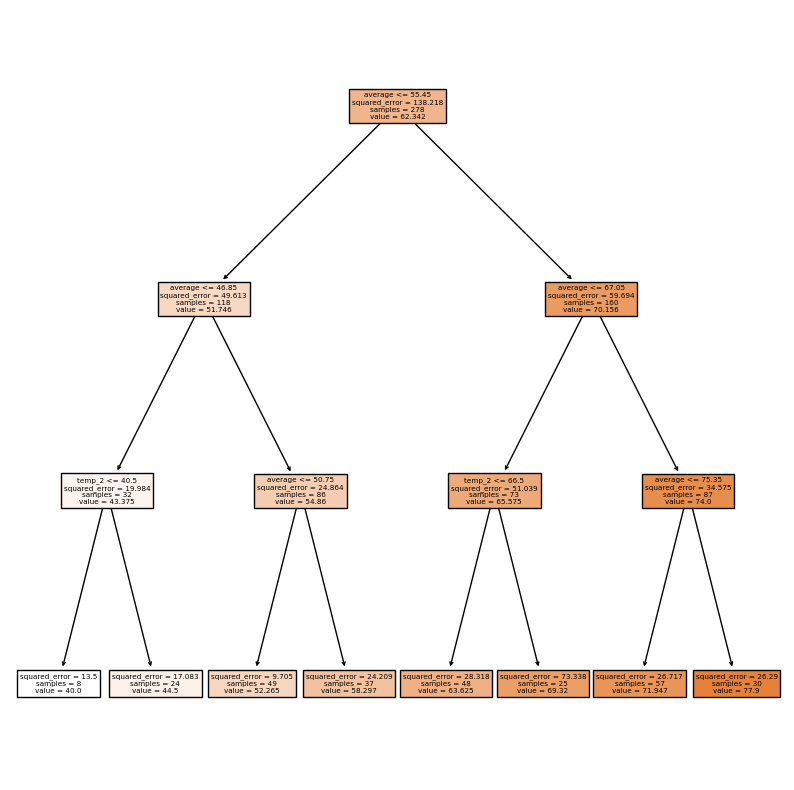

In [193]:
plt.figure(figsize=(10,10))
plot_tree(dtr_depth3,
               feature_names=X_train.columns,
               filled = True);

In [195]:
dtr_depth3.predict([[1, 2, 3, 4]])

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([40.])

### 10. Utiliza un grid search con cross validation.

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
estimator = DecisionTreeRegressor()
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8]}
gs = GridSearchCV(estimator= estimator, param_grid= param_grid, scoring= 'neg_mean_absolute_error', cv = 5)

gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_mean_absolute_error')

In [198]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=8)

In [199]:
gs.best_score_

-4.584686961036799

In [200]:
mean_absolute_error(Y_test, gs.best_estimator_.predict(X_test))

4.150352989680722

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [202]:
X_train.columns

Index(['temp_2', 'average', 'forecast_noaa', 'month_num'], dtype='object')

In [201]:
gs.best_estimator_.feature_importances_

array([0.02361315, 0.9653088 , 0.00367454, 0.00740351])

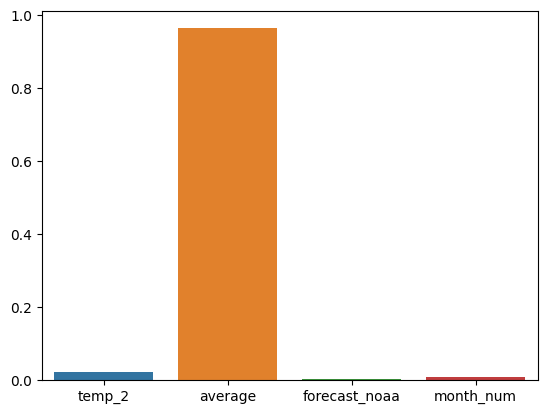

In [204]:
sns.barplot(x = X_train.columns, y = gs.best_estimator_.feature_importances_);

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [207]:
import numpy as np

In [208]:
temps['actual_cat'] = np.where(temps['actual'] > 59, 1, 0)

In [209]:
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_num,month_num,actual_cat
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,4,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,5,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,6,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,0,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,1,0,0
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,2,0,0
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,3,0,0
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,4,0,0


In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X, temps['actual_cat'], test_size= 0.20, random_state= 42)

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
estimator = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8]}
gs = GridSearchCV(estimator= estimator, param_grid= param_grid, scoring= 'accuracy', cv = 5)

gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [213]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [216]:
gs.best_score_

0.885064935064935

In [220]:
X_train.columns

Index(['temp_2', 'average', 'forecast_noaa', 'month_num'], dtype='object')

In [219]:
gs.best_estimator_.feature_importances_

array([0.06110158, 0.90630829, 0.03259013, 0.        ])

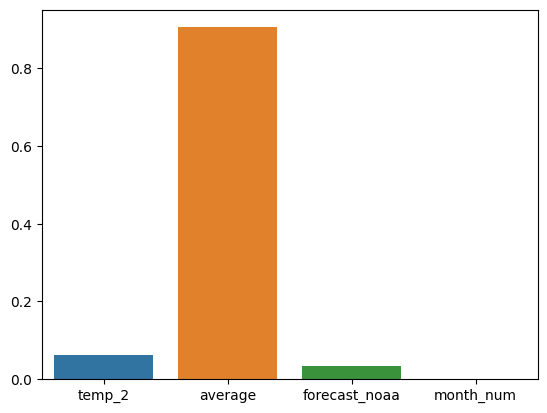

In [221]:
sns.barplot(x = X_train.columns, y = gs.best_estimator_.feature_importances_);

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
estimator = RandomForestClassifier()
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8]}
gs = GridSearchCV(estimator= estimator, param_grid= param_grid, scoring= 'accuracy', cv = 5)

gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [224]:
gs.best_score_

0.8995454545454544